# Program Principale
### ------------------------------------------------------------------------------------

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 14 16:59:31 2018

@author: auguste
"""

import numpy as np
import scipy
import matplotlib.pyplot as plt
import re


##################################################
##################################################
##################################################
#   This program read the VASP XDATCAR file in order to operate on ions coordinates
##################################################
##################################################
##################################################



#~/Server_mount/Ruthenium/Molecular_Dynamics/KPOINTS_361/RPBE/SMASSS_0.01/756580.maui01_Molecular_dynamics_SMASS_0.01_RPBE_KPOINT_361/finish/767798.maui01_Molecular_dynamics_SMASS_0.01_RPBE_KPOINT_361


#home/auguste/TEST/IBRION_2/XDATCAR'

XDATCAR_PATH= '/home/auguste/Server_mount/Ruthenium/Molecular_Dynamics/KPOINTS_361/RPBE/SMASSS_0.01/756580.maui01_Molecular_dynamics_SMASS_0.01_RPBE_KPOINT_361/finish/767798.maui01_Molecular_dynamics_SMASS_0.01_RPBE_KPOINT_361/XDATCAR'


##################################################
#   Start reading the number of configuration in XDATCAR file
##################################################
config_number=0
XDATCAR_file = open(XDATCAR_PATH,'r')

for line in XDATCAR_file:
    if re.match("Direct configuration=", line):
        config_number = config_number +1

print('configuration number = ', config_number, ' is ',type(config_number))
print('')
##################################################
#   End reading the number of configuration in XDATCAR file
##################################################



##################################################
#   Start reading informations of the XDATCAR file
##################################################

with open(XDATCAR_PATH,'r') as XDATCAR_file:
    
    ##################################################
    #   Reading first line of the document
    ##################################################
    
    comment_line = str(XDATCAR_file.readline()) 
    
    ##################################################
    #   Reading the lattice parameter which multiply the matrix
    ##################################################
    
    lparam_a = float(XDATCAR_file.readline())
    
    ##################################################
    #   Reading the lattice vectors a,b,c
    ##################################################
    
    cell_vectors= [] #They are lying... In python we must initialised variables... I don't understand why peoples find this easier than fortran... #SadWorld
    for i in range(3):
        cell_vectors.append(np.array(next(XDATCAR_file).split()).astype(float))
        
    cell_vectors = np.asarray(cell_vectors)# to convert cell_vector in a nice computable matrix
    
    
    
        #I stop here to comment a bit the program.
        #split() is used to split the readed line into column. Without argument it skip blank space (that is what we want it to do). It also put all the splited colums in an array.
        #next(file) is used to pass to the next output. 
        #That is to say: the current output is the one of the precedent readed line "lparam_a", then with next() we are going to the following outup, thus we get the first line of cell vector, and so on three times, as it is in range(3) for loop.
        #Finally we used .append() to concatenate the three vectors in an array to create a matrix !
        #We hence have floats, in array, in array == matrix
        
    ##################################################
    #   Reading species
    ##################################################
    
    species = XDATCAR_file.readline().split()
    
    ##################################################
    #   Reading the number of element of each species
    ##################################################
    
    species_number = np.array(XDATCAR_file.readline().split()).astype(int)
   
    
    #Counting the number of ions in the system
    ions_number=0
    for i in range(len(species_number)):
        ions_number = ions_number + species_number[i]
    
   
    
    ##################################################
    #   Reading the number label of the configuration & ions vector for this configuration
    ##################################################
    
    
    
    
    configuration = []
    for conf in range(config_number):
        configuration_label = np.array(re.findall(r'[\d.]+', XDATCAR_file.readline())).astype(int)
        #print('configuration_label= ',configuration_label, ' is ',type(configuration_label[0]))
        #print('')
        ions_vectors = []
        for i in range(ions_number):
            ions_vectors.append(np.array(next(XDATCAR_file).split()).astype(float))   
            
        configuration.append(np.array(ions_vectors))
        #print('ions_vectors= ',ions_vectors, ' is ',type(ions_vectors))
        #print('')
    configuration = np.asarray(configuration) # convert configuration in a nice matrix
    
    #Example: configuration[2][1,1] is the 3rd configuration, 2nd line, y coordinate
    
    
XDATCAR_file.closed
##################################################
#   End of reading informations of the XDATCAR file
##################################################

print('comment_line= ',comment_line, ' is ',type(comment_line))
print('')
print('lparam_a= ',lparam_a, ' is ',type(lparam_a))
print('')
print('cell_vectors= ',cell_vectors, ' is ',type(cell_vectors))
print('')
print('species= ',species, ' is ',type(species))
print('')
print('species_number= ',species_number, ' is ',type(species_number[0]))
print('')
print('ions_number= ',ions_number, ' is ',type(ions_number))
print('')
#print('configuration_label= ',configuration_label, ' is ',type(configuration_label[0]))
#print('')
#print('ions_vectors= ',ions_vectors, ' is ',type(ions_vectors))
#print('')
#print('configuration= ',configuration, ' is ',type(configuration))
#print('')
print('configuration= ',configuration[0], ' is ',type(configuration))
print('')
print('configuration= ',configuration[-1], ' is ',type(configuration))
print('')


configuration number =  10000  is  <class 'int'>

comment_line=  Ru                                      
  is  <class 'str'>

lparam_a=  1.0  is  <class 'float'>

cell_vectors=  [[10.92      0.        0.      ]
 [ 2.73      4.728499  0.      ]
 [ 0.        0.       30.0027  ]]  is  <class 'numpy.ndarray'>

species=  ['Ru', 'C', 'O']  is  <class 'list'>

species_number=  [40  4  8]  is  <class 'numpy.int64'>

ions_number=  52  is  <class 'numpy.int64'>

configuration=  [[0.         0.         0.        ]
 [0.25       0.         0.        ]
 [0.5        0.         0.        ]
 [0.75       0.         0.        ]
 [0.         0.5        0.        ]
 [0.25       0.5        0.        ]
 [0.5        0.5        0.        ]
 [0.75       0.5        0.        ]
 [0.16666667 0.33333333 0.07142857]
 [0.41666667 0.33333333 0.07142857]
 [0.66666667 0.33333333 0.07142857]
 [0.91666667 0.33333333 0.07142857]
 [0.16666667 0.83333333 0.07142857]
 [0.41666667 0.83333333 0.07142857]
 [0.66666667 0.8333333

 # Test ou module du program
 ### ------------------------------------------------------------------------------------ 

## Creating an array with label that correspond to ions in orer to identify them.

In [2]:

#Now that data has been loads, we can play with it

##################################################
#   Creating an array of ions' label to later identy them
##################################################


ion_label = []
for i in range(3):
    for j in range(species_number[i]):
        k=j+1
        ion_label.append(species[i]+str(k))
print(ion_label)
        
        
##################################################
#   
##################################################

['Ru1', 'Ru2', 'Ru3', 'Ru4', 'Ru5', 'Ru6', 'Ru7', 'Ru8', 'Ru9', 'Ru10', 'Ru11', 'Ru12', 'Ru13', 'Ru14', 'Ru15', 'Ru16', 'Ru17', 'Ru18', 'Ru19', 'Ru20', 'Ru21', 'Ru22', 'Ru23', 'Ru24', 'Ru25', 'Ru26', 'Ru27', 'Ru28', 'Ru29', 'Ru30', 'Ru31', 'Ru32', 'Ru33', 'Ru34', 'Ru35', 'Ru36', 'Ru37', 'Ru38', 'Ru39', 'Ru40', 'C1', 'C2', 'C3', 'C4', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']


## Convert from direct to cartesian values 

In [3]:
def direct_to_cartesian(coordinate,cell_matrix, print_cell_vectors= False):
    """This function aim to convert a direct coordinate [x,y,z] array to a cartesian [x,y,z] array using the cell matrix.
    
    Variables:
    ----------
    
    coordinate: must be an [x,y,z] array
    
    cell_matrix: must be a matrix such as [[x,y,z],[x,y,z],[x,y,z]] in order to convert the coordinate array. Note that each row of the matrix are repectively a,b,c cell's vector.
    
    
    Examples:
    ---------
    
    
    """
    #Loop to check if the convertion is possible
    if not np.any(cell_matrix):
        print('The given cell matrix is empty. Please give cell matrix.')
    else:
        if print_cell_vectors == True:
            print('Cell vectors are :', cell_matrix)
    #Starting conversion
    return np.matmul(cell_matrix,coordinate)
    

In [28]:


real_cell_vectors = lparam_a * np.asarray(cell_vectors)

configuration_cartesian = []
for j in range(config_number):
    ions_vectors_cart = []
    for i in range(ions_number):
        ions_vectors_cart.append(np.matmul(configuration[j][i,:],cell_vectors))
    configuration_cartesian.append(ions_vectors_cart)
configuration_cartesian = np.asarray(configuration_cartesian) # convert configuration_cartesian in a nice matrix
print(configuration_cartesian.shape)
print(type(configuration_cartesian))
print(configuration_cartesian[0][:,:])
    
    


(10000, 52, 3)
<class 'numpy.ndarray'>
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.73000000e+00 0.00000000e+00 0.00000000e+00]
 [5.46000000e+00 0.00000000e+00 0.00000000e+00]
 [8.19000000e+00 0.00000000e+00 0.00000000e+00]
 [1.36500000e+00 2.36424950e+00 0.00000000e+00]
 [4.09500000e+00 2.36424950e+00 0.00000000e+00]
 [6.82500000e+00 2.36424950e+00 0.00000000e+00]
 [9.55500000e+00 2.36424950e+00 0.00000000e+00]
 [2.73000003e+00 1.57616632e+00 2.14304996e+00]
 [5.46000003e+00 1.57616632e+00 2.14304996e+00]
 [8.19000003e+00 1.57616632e+00 2.14304996e+00]
 [1.09200000e+01 1.57616632e+00 2.14304996e+00]
 [4.09500003e+00 3.94041582e+00 2.14304996e+00]
 [6.82500003e+00 3.94041582e+00 2.14304996e+00]
 [9.55500003e+00 3.94041582e+00 2.14304996e+00]
 [1.22850000e+01 3.94041582e+00 2.14304996e+00]
 [1.36146021e+01 4.71848286e+00 4.28465468e+00]
 [2.67139069e+00 5.81298025e-03 4.30697969e+00]
 [8.17527755e+00 4.70715872e+00 4.26878326e+00]
 [8.16917392e+00 3.75109934e-02 4.24859534e+00]
 

In [5]:
#print(np.asarray(cell_vectors))
#print(type(np.asarray(cell_vectors)[0,1]))

['O5', 'O6']
['O6']
Distance mean:  2.7304468637572974


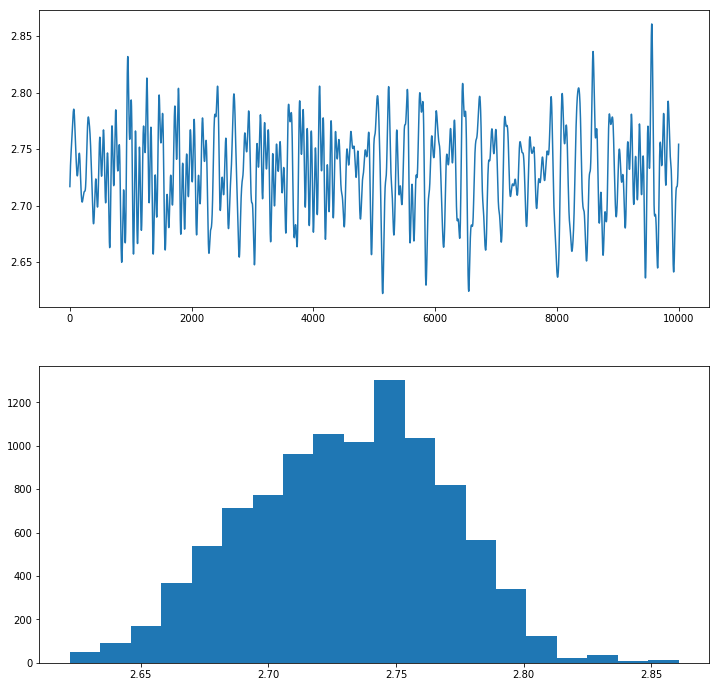

In [57]:



distance = []
#element_plot = ['O5','O6','O7','O8']
element_plot = ['O5','O6']
for i in element_plot:
    print(element_plot)
    if len(element_plot) == 1:
            break
    ion_index = ion_label.index(i)
    element_plot.remove(i)
    for k in element_plot:
        print(element_plot)
        second_ion_index=ion_label.index(k)
        for j in range(config_number):
            distance.append(np.linalg.norm(configuration_cartesian[j][ion_index,:]-configuration_cartesian[j][second_ion_index,:]))
    

    
    
plt.figure(1,figsize=(12,12))               
plt.subplot(211)             
plt.plot(range(config_number),distance)
plt.subplot(212)            
plt.hist(distance,bins=20)

  

print('Distance mean: ', np.mean(distance))    
#print(distance)



Pour /home/auguste/TEST/IBRION_2/XDATCAR:
-----------------------------------------------------------------------

Si on prends deux vecteurs position tel ceux de O_7 et O_8, la norme de la difference de leurs vecteur position reste constante tout le long de la minimisation. Soit je me suis trompé dans ce qu'il me semble être la distance entre les deux vecteurs, soit il y a quelaue chose de très étrange...  